# 1. Data Cleaning & Exploratory Data Analysis

## Import Modules, Load Data & Data Review

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import datetime as dt
from sklearn import preprocessing as p

pd.set_option('display.max_columns', None)

In [151]:
# It takes more time to read excel file, so convert it to csv file
#df = pd.read_excel("Online Retail.xlsx")
#df.to_csv('Online_Retail.csv')

In [152]:
df_artist=pd.read_csv('artist - dfg.csv',index_col=0)
df_artist.head()

,about,arttypeids,genretypeids,demographic,contactmethod,contactname,contactphone,contactemail,ispublic,coverphoto,availabilitytext,stages,hiresphotos,medialinks,headline,maingenretypeid,subgenretypeids,musictypeid,gstnumber,preferredpronouns,diversitytagids
uuid,,,,,,,,,,,,,,,,,,,,,
1f9a4e1c-ce58-4fbd-b4a6-51bd782179ed,True,"[""performingarts""]",[],False,NaN,True,True,False,True,False,False,False,True,True,True,other-performingarts,"[""other-performingarts""]",NaN,False,False,False
050270db-8a83-411c-a05e-4439c14d9fe1,True,"[""performingarts""]",[],True,NaN,True,True,False,True,True,True,True,False,True,False,theatre,"[""other-performingarts""]",NaN,False,False,False
d6c3b93c-f170-436c-9f07-c7d19ccc8cd8,True,"[""music""]",[],False,NaN,True,True,False,True,False,False,False,False,True,True,rb,"[""hiphop-rap""]",originals,False,False,False
42f89e8b-b818-44ea-ade3-125b15854d03,True,"[""music""]",[],False,NaN,True,True,False,True,False,False,False,False,True,True,folk,"[""blues"",""singer-songwriter""]",originals,False,False,False
6c3b139b-1d00-434f-91b0-09bee9743618,True,"[""music""]",[],True,NaN,True,True,False,True,True,True,True,True,True,True,indie-rock,"[""alternative""]",originals,False,False,False


In [153]:
df_application=pd.read_csv('application - dfg.csv',index_col=0)
df_application.head()

,artistid,programid,bookingid,state,reason,reasonmessage,bandmembers,hasbandmembers
uuid,,,,,,,,
5e446a77-2289-4d8e-8b2a-75d1469d83e5,28dcc90c-db25-4a7b-95f5-a8b9f1d2091e,1edabf72-566e-46fe-a1f3-e319391ef353,NaN,closed,withdrawn,False,False,False
0a7603d3-65e9-46fd-9655-fd7cd5f85bf9,1ba84c04-229f-42ec-b893-ee2fb82a3920,d111d280-693e-43ff-9d7b-eb03d4d4d3b4,NaN,closed,expired,False,False,False
b7e851d8-7290-42ff-9771-bda8b5b7dc5a,95c2dfa0-0bc2-4e58-8784-70077499e256,1edabf72-566e-46fe-a1f3-e319391ef353,7e08a987-8934-48d6-8cc0-fd1671b1eeae,closed,NaN,False,False,False
c4e0885b-24f8-483e-82f3-03f9c328f3b5,50f2ebbd-5d63-4654-aab2-02d23a849621,1edabf72-566e-46fe-a1f3-e319391ef353,b27cdfea-8158-4365-8a47-9bc0a28b19f2,closed,NaN,False,False,False
d8e950b2-24a4-4b21-b395-fb4cab63269f,2d7a4e26-975d-4ba6-a8c9-d92c3cafcb7c,1edabf72-566e-46fe-a1f3-e319391ef353,1330a8b7-d14d-4e4c-b30d-a659e55dd39c,closed,NaN,False,False,False


In [154]:
df_booking=pd.read_csv('booking - dfg.csv',index_col=0)
df_booking.head()

,artistid,venueid,eventid,stageid,programid,eventtitle,eventdescription,covercharge,exceptions,declinedby,declinetype,declinemessage,bandmembers,hasbandmembers,pay,traffic,confirmplayedat,type,eventtype,ticketingurl,venuetitle,artistsignuplimit,streaminglinks,target,artistpayment
uuid,,,,,,,,,,,,,,,,,,,,,,,,,
0d4abc09-d003-4fd1-8262-176b84361a12,NaN,6aa40e9c-c4b3-4745-b4d7-193d91b79a2d,51c98f65-9bd8-47ae-b3de-7d7a6372d12d,NaN,NaN,True,True,NaN,False,NaN,NaN,False,False,False,NaN,NaN,NaN,manual,NaN,False,False,NaN,False,event,NaN
88fa5fc0-d9e6-4d5c-b9bf-a5c81f8889d3,d0730312-dfca-4aae-bacc-2fc125665b64,5082f57f-32d7-4533-b362-48770cc507c7,NaN,8318a8f7-34ca-4149-bee8-8124ba751c2b,NaN,False,False,NaN,False,artist,other,False,False,False,100.0,NaN,NaN,NaN,NaN,False,False,NaN,False,event,NaN
3c1230c8-5ef3-46d1-b6e3-4bd21eed0d0d,e30f223d-9d6b-4cec-80b3-fd657dfc8066,c3793403-0a75-446b-9018-285c0e0e5c16,NaN,NaN,NaN,False,False,NaN,False,venue,other,False,False,False,NaN,NaN,NaN,NaN,NaN,False,False,NaN,False,content,NaN
9395f628-3696-4dd1-8950-00111765a0d9,a75578d0-a1b7-4f1f-9043-48f96a588509,ccf175b3-282f-4cf0-874e-b9b9401e8ec6,15b6cd90-9b3c-432b-9fad-4e2cc976f3fa,8d1ae857-702c-4e13-bff0-c9ab8d991ea3,NaN,True,True,NaN,False,NaN,other,False,False,False,300.0,NaN,2022-04-14 22:13:55.384-06,NaN,NaN,False,False,NaN,False,event,325.5
91b08d14-131c-4ec6-a76f-1a101e5064a4,1efe9d58-0e67-486c-8f56-ca0dbb7e5fce,ad9874ad-6942-4e9a-bd88-0e21ce93ec85,3a2aaadd-54c2-401a-8bde-26c571cdfc0a,b2a9511f-eb5b-422e-8a1a-78f6d97485a5,5a179bf9-ec04-48fe-be63-f8ef1cbaf4c8,False,False,NaN,False,NaN,NaN,False,False,False,200.0,3.0,2022-09-16 17:58:03.824-06,NaN,NaN,False,False,NaN,False,event,210.0


In [155]:
df_event=pd.read_csv('event - dfg.csv',index_col=0)
df_event.head()

,artistid,venueid,stageid,state,artisttitle,coverchargestr,description,type,artistsignuplimit,manual,venuetitle,livevideourl,streaminglinks
uuid,,,,,,,,,,,,,
d984fdbb-d68f-44e2-9526-eb6fee121082,66e3c756-4e72-4b38-b514-f23706de7384,19a27057-7df2-4f22-bbfe-11e5ba75b692,NaN,public,False,$5,False,NaN,NaN,False,False,False,False
b72fcc63-22e7-4804-9637-aeb2b1d910a0,NaN,6aa40e9c-c4b3-4745-b4d7-193d91b79a2d,NaN,public,True,NO COVER,False,NaN,NaN,True,False,False,False
01092deb-841a-45f6-b1e6-8b98297de7e0,9f2b4780-dc9c-4e97-b4de-c626ec0efd9e,30258a3c-2daf-4b12-b52c-747bf032d23b,NaN,public,False,NaN,False,NaN,NaN,False,False,False,False
1e90c08e-73dc-4d7d-b446-4e3229f1706a,ea0a608a-b939-4fcf-944a-e01316ed3cdd,6906845b-d578-42f9-b75e-1e1a223a938c,NaN,cancelled,False,NaN,False,NaN,NaN,False,False,False,False
fba7758f-3bf7-41da-98c6-ccb152e10f6f,NaN,30258a3c-2daf-4b12-b52c-747bf032d23b,NaN,cancelled,True,NaN,False,NaN,NaN,True,False,False,False


In [156]:
df_program=pd.read_csv('program - dfg.csv',index_col=0)
df_program.head()

,venueid,name,description
uuid,,,
58add7e1-7c36-438a-9a89-049c56fad088,0aa91076-f3af-44a0-885e-e2a0cf8df589,True,True
c828cf8e-f604-499a-bfeb-9859fa094fbb,296da7fa-70b6-4af4-84d5-371bd65cae87,True,True
9f24a199-6ce0-489c-a21b-15b73e8eb903,f7bf37c1-12db-4306-b889-36074fc73527,True,True
499e4f6a-0ca0-4625-a334-ffde1b176fec,82d9fe60-73f6-464b-aaae-fb88a9ddc463,True,True
7d293f7d-f0c4-49d3-a132-6c7c3e7d494d,4b7c456c-e7a2-4809-a20c-dfff50a88a5d,True,False


In [157]:
df_programmember=pd.read_csv('programmember - dfg.csv',index_col=0)
df_programmember.head()

,artistid,programid
uuid,,
b0e1477f-4b1e-48bb-b0f3-8d91f9a9d6c7,e73b4f5b-19a0-43d2-8b8f-626eff913d1a,df482bf6-47f6-4d34-befa-30ae1e3100b7
c041a136-e342-4cd3-8d44-2e332aa012c3,01693bc0-8330-4b46-bf93-03cfeecd05b6,df482bf6-47f6-4d34-befa-30ae1e3100b7
a2609033-4496-49e1-ad74-7a7cf78b52bb,8aab7237-9fa5-443b-ba90-638666fc54a5,df482bf6-47f6-4d34-befa-30ae1e3100b7
fec80250-3a81-45a2-9f6e-94556f058d40,2fd145c4-db44-401b-9ac6-e3d76d6ea531,df482bf6-47f6-4d34-befa-30ae1e3100b7
9bb81318-4e92-419f-bfdd-5b001ab0ecad,ff4aadeb-1a06-4c37-a1a9-ff0ad59d9f2a,df482bf6-47f6-4d34-befa-30ae1e3100b7


In [158]:
df_socials=pd.read_csv('socials - dfg.csv',index_col=0)
df_socials.head()

,instagram,tiktok,facebook,twitter,youtubechannel,website,applemusic,spotify,embeddedyoutube
artistid,,,,,,,,,
f11a4358-7c2a-49d6-b7e4-d0e7d2e1baf8,True,False,True,True,True,True,True,True,True
8bc3bd6f-b0d5-43b6-aada-42cb7d286af3,True,False,True,True,True,True,True,True,True
8d02d0f0-3b08-464f-8af4-6d9bd0286e31,True,False,True,True,True,True,True,True,True
0126af85-9667-4f56-bf4b-356fbda542d1,False,False,True,False,False,True,False,False,False
07a11a6a-cb48-49bb-abca-d47b390194b4,False,False,False,False,False,True,False,False,False


In [159]:
df_stage=pd.read_csv('stage - dfg.csv',index_col=0)
df_stage.head()

,venueid,programid
uuid,,
c319e4b7-535d-4021-bd9f-d516fa2071a0,c841c9c3-2356-45c5-9d2c-de9e40ff96fd,NaN
0b45bf5a-1b38-48b4-be3c-f8d757028f2e,439bff5c-b5e9-413c-bcfc-28050082678a,NaN
19a6e2db-c222-4689-b577-fbbab26a1204,c841c9c3-2356-45c5-9d2c-de9e40ff96fd,NaN
bb5cff94-5177-418b-a94f-b57775612bcd,d145fb23-f169-4992-9de0-8a952d6b05bd,NaN
0c0abab4-3a9c-4914-a6b2-005a64b6dba9,10ea7727-d091-4892-8873-3563d0125d8b,NaN


In [160]:
df_venue=pd.read_csv('venue - dfg.csv',index_col=0)
df_venue.head()

""
uuid
b2387b2c-9172-48cf-9b97-6d1a57dc0c75
ee7139ad-b49a-49fe-ad6b-6d6cbc0c4ea8
5d1cf4a5-f942-4405-9039-ddea275eb1f6
346ffc61-4b0c-4170-8684-668b9db07e01
479d0b3b-df72-427f-91e2-956343efec45


In [161]:
def explain(attribute):
    features= {'InvoiceNo': "Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.",
    'StockCode': 'Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.',
    'Description': 'Product (item) name. Nominal.',
    'Quantity': 'The quantities of each product (item) per transaction. Numeric.',
    'InvoiceDate': 'Invice Date and time. Numeric, the day and time when each transaction was generated.',
    'UnitPrice': 'Unit price. Numeric, Product price per unit in sterling.',
    'CustomerID': 'Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.',
    'Country': 'Country name. Nominal, the name of the country where each customer resides.'}
    return features[attribute]

### Descriptive Analysis (df_artist)

In [162]:
df_artist

,about,arttypeids,genretypeids,demographic,contactmethod,contactname,contactphone,contactemail,ispublic,coverphoto,availabilitytext,stages,hiresphotos,medialinks,headline,maingenretypeid,subgenretypeids,musictypeid,gstnumber,preferredpronouns,diversitytagids
uuid,,,,,,,,,,,,,,,,,,,,,
1f9a4e1c-ce58-4fbd-b4a6-51bd782179ed,True,"[""performingarts""]",[],False,NaN,True,True,False,True,False,False,False,True,True,True,other-performingarts,"[""other-performingarts""]",NaN,False,False,False
050270db-8a83-411c-a05e-4439c14d9fe1,True,"[""performingarts""]",[],True,NaN,True,True,False,True,True,True,True,False,True,False,theatre,"[""other-performingarts""]",NaN,False,False,False
d6c3b93c-f170-436c-9f07-c7d19ccc8cd8,True,"[""music""]",[],False,NaN,True,True,False,True,False,False,False,False,True,True,rb,"[""hiphop-rap""]",originals,False,False,False
42f89e8b-b818-44ea-ade3-125b15854d03,True,"[""music""]",[],False,NaN,True,True,False,True,False,False,False,False,True,True,folk,"[""blues"",""singer-songwriter""]",originals,False,False,False
6c3b139b-1d00-434f-91b0-09bee9743618,True,"[""music""]",[],True,NaN,True,True,False,True,True,True,True,True,True,True,indie-rock,"[""alternative""]",originals,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94820f8b-74f4-4cb0-80be-a284e55ba63b,True,"[""music""]",[],True,NaN,True,True,False,True,True,True,True,True,True,True,country,"[""pop"",""singer-songwriter""]",covers,False,False,True
c8edd4e7-7724-4629-b7c6-0b92596bdbf9,True,"[""music""]",[],True,NaN,True,True,False,True,True,True,True,True,True,True,instrumental,"[""jazz"",""singer-songwriter""]",covers,False,False,False
607ac2b7-bd06-4d63-b9d4-d73db8ee164a,True,"[""music""]",[],True,NaN,True,True,False,True,True,True,True,True,True,True,other-music,"[""americana"",""jazz""]",originals,False,False,True


In [163]:
df_artist.shape

(2300, 21)

In [164]:
df_artist.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2300 entries, 1f9a4e1c-ce58-4fbd-b4a6-51bd782179ed to 32bffb74-48f2-44d1-ac87-333b7a307a1c
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   about              2300 non-null   bool  
 1   arttypeids         2300 non-null   object
 2   genretypeids       2300 non-null   object
 3   demographic        2300 non-null   bool  
 4   contactmethod      62 non-null     object
 5   contactname        2300 non-null   bool  
 6   contactphone       2300 non-null   bool  
 7   contactemail       2300 non-null   bool  
 8   ispublic           2300 non-null   bool  
 9   coverphoto         2300 non-null   bool  
 10  availabilitytext   2300 non-null   bool  
 11  stages             2300 non-null   bool  
 12  hiresphotos        2300 non-null   bool  
 13  medialinks         2300 non-null   bool  
 14  headline           2300 non-null   bool  
 15  maingenretypeid    1932 non

In [165]:
df_artist.describe()

,about,arttypeids,genretypeids,demographic,contactmethod,contactname,contactphone,contactemail,ispublic,coverphoto,availabilitytext,stages,hiresphotos,medialinks,headline,maingenretypeid,subgenretypeids,musictypeid,gstnumber,preferredpronouns,diversitytagids
count,2300,2300,2300,2300,62,2300,2300,2300,2300,2300,2300,2300,2300,2300,2300,1932,1919,2205,2300,2300,2300
unique,2,6,301,2,61,2,2,2,2,2,2,2,2,2,2,53,351,2,2,2,2
top,True,"[""music""]",[],False,website,True,True,False,True,True,False,False,True,True,True,singer-songwriter,[],originals,False,False,False
freq,2069,2198,1804,1597,2,2152,2085,2069,1991,1739,1747,1192,1374,2195,1775,320,66,1658,2221,2166,1879


In [166]:
# Checking for the duplicates
df_artist.duplicated().value_counts()

False    2172
True      128
dtype: int64

In [167]:
df_artist.drop_duplicates(inplace=True)

In [168]:
# Shape after dropping duplicates
df_artist.shape

(2172, 21)

In [169]:
# Checking for missing values
df_artist.isnull().sum()*100 / df_artist.shape[0]

about                 0.000000
arttypeids            0.000000
genretypeids          0.000000
demographic           0.000000
contactmethod        97.145488
contactname           0.000000
contactphone          0.000000
contactemail          0.000000
ispublic              0.000000
coverphoto            0.000000
availabilitytext      0.000000
stages                0.000000
hiresphotos           0.000000
medialinks            0.000000
headline              0.000000
maingenretypeid      15.377532
subgenretypeids      16.252302
musictypeid           3.867403
gstnumber             0.000000
preferredpronouns     0.000000
diversitytagids       0.000000
dtype: float64

In [170]:
# Alternative
def summary(df_artist, pred=None):
    obs = df_artist.shape[0]
    Types = df_artist.dtypes
    Counts = df_artist.apply(lambda x: x.count())
    Min = df_artist.min()
    Max = df_artist.max()
    Uniques = df_artist.apply(lambda x: x.unique().shape[0])
    Nulls = df_artist.apply(lambda x: x.isnull().sum())
    print('Data shape:', df_artist.shape)

    if pred is None:
        cols = ['Types', 'Counts', 'Uniques', 'Nulls', 'Min', 'Max']
        str = pd.concat([Types, Counts, Uniques, Nulls, Min, Max], axis = 1, sort=True)

    str.columns = cols
    print('___________________________\nData Types:')
    print(str.Types.value_counts())
    print('___________________________')
    return str

details = summary(df_artist)
display(details.sort_values(by='Nulls', ascending=False))

Data shape: (2172, 21)
___________________________
Data Types:
bool      15
object     6
Name: Types, dtype: int64
___________________________


C:\Users\Kayaharman\AppData\Local\Temp\ipykernel_13272\1746119635.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Min = df_artist.min()
C:\Users\Kayaharman\AppData\Local\Temp\ipykernel_13272\1746119635.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Max = df_artist.max()


,Types,Counts,Uniques,Nulls,Min,Max
contactmethod,object,62,62,2110,NaN,NaN
subgenretypeids,object,1819,352,353,NaN,NaN
maingenretypeid,object,1838,54,334,NaN,NaN
musictypeid,object,2088,3,84,NaN,NaN
gstnumber,bool,2172,2,0,False,True
stages,bool,2172,2,0,False,True
preferredpronouns,bool,2172,2,0,False,True
medialinks,bool,2172,2,0,False,True
ispublic,bool,2172,2,0,False,True
hiresphotos,bool,2172,2,0,False,True


**Evaluations:**
* `The CustomerID` and `Description` fields have null values.
* `Quantity` and `UnitPrice` should have a value >= 0, but from the summary above there are negative values for the two columns.

In [171]:
df_artist.about.value_counts()

True     1960
False     212
Name: about, dtype: int64

In [172]:
df_artist.arttypeids.value_counts()

["music"]                                  2081
["performingarts"]                           57
["visualarts"]                               18
["other"]                                    14
["music","visualarts","performingarts"]       1
["music","visualarts"]                        1
Name: arttypeids, dtype: int64

In [173]:
df_artist.genretypeids.value_counts()

[]                                                                              1704
["jazz"]                                                                          31
["singer-songwriter"]                                                             28
["folk","singer-songwriter"]                                                      18
["folk","pop","singer-songwriter"]                                                 8
                                                                                ... 
["americana","country","folk","other-music","singer-songwriter"]                   1
["blues","country","pop","rock"]                                                   1
["americana","bluegrass","country","folk","pop","roots","singer-songwriter"]       1
["blues","folk","pop","roots","singer-songwriter","soul"]                          1
["americana","bluegrass","folk","singer-songwriter"]                               1
Name: genretypeids, Length: 301, dtype: int64

In [174]:
df_artist.demographic.value_counts()

False    1496
True      676
Name: demographic, dtype: int64

In [175]:
df_artist.contactmethod.value_counts()

website                                  2
Agent - Jacqueline Nicoll - Nashville    1
hez7924@gmail.com                        1
stevepineo@shaw.ca                       1
tirnanog76@hotmail.com                   1
                                        ..
henry@henrywhitemusic.com                1
me@amythiessen.com                       1
jenny@jennyallen.ca                      1
honeyandpearls@gmail.com                 1
carlyreirson.music@gmail.com             1
Name: contactmethod, Length: 61, dtype: int64

In [176]:
df_artist.contactname.value_counts()

True     2047
False     125
Name: contactname, dtype: int64

In [177]:
df_artist.contactphone.value_counts()

True     1982
False     190
Name: contactphone, dtype: int64

In [178]:
df_artist.contactemail.value_counts()

False    1943
True      229
Name: contactemail, dtype: int64

In [179]:
df_artist.ispublic.value_counts()

True     1890
False     282
Name: ispublic, dtype: int64

In [180]:
df_artist.coverphoto.value_counts()

True     1662
False     510
Name: coverphoto, dtype: int64

In [181]:
df_artist.availabilitytext.value_counts()

False    1638
True      534
Name: availabilitytext, dtype: int64

In [182]:
df_artist.stages.value_counts()

False    1100
True     1072
Name: stages, dtype: int64

In [183]:
df_artist.hiresphotos.value_counts()

True     1305
False     867
Name: hiresphotos, dtype: int64

In [184]:
df_artist.medialinks.value_counts()

True     2088
False      84
Name: medialinks, dtype: int64

In [185]:
df_artist.headline.value_counts()

True     1678
False     494
Name: headline, dtype: int64

In [186]:
df_artist.maingenretypeid.value_counts()

singer-songwriter       293
rock                    143
pop                     139
folk                    138
country                 133
jazz                    107
alternative              97
indie-rock               94
rb                       60
classic-rock             58
americana                56
alt-country              53
hiphop-rap               40
instrumental             40
other-music              36
blues                    36
classical                32
roots                    32
punk                     24
soul                     24
electronic               22
topforty                 20
dance                    19
funk                     18
celtic                   13
bluegrass                10
metal                     9
theatre                   7
house                     7
circus                    7
photography               6
rockabilly                6
other-performingarts      6
ambient                   6
children                  5
painting            

In [187]:
df_artist.subgenretypeids.value_counts()

[]                                56
["pop"]                           49
["folk"]                          48
["pop","singer-songwriter"]       35
["singer-songwriter"]             35
                                  ..
["electronic","roots"]             1
["storyteller"]                    1
["alternative","instrumental"]     1
["ambient","dancemusic"]           1
["indigenous","roots"]             1
Name: subgenretypeids, Length: 351, dtype: int64

In [188]:
df_artist.musictypeid.value_counts()

originals    1551
covers        537
Name: musictypeid, dtype: int64

In [189]:
df_artist.gstnumber.value_counts()

False    2093
True       79
Name: gstnumber, dtype: int64

In [190]:
df_artist.preferredpronouns.value_counts()

False    2040
True      132
Name: preferredpronouns, dtype: int64

In [191]:
df_artist.diversitytagids.value_counts()

False    1756
True      416
Name: diversitytagids, dtype: int64

### Descriptive Analysis (df_application)

In [192]:
df_application

,artistid,programid,bookingid,state,reason,reasonmessage,bandmembers,hasbandmembers
uuid,,,,,,,,
5e446a77-2289-4d8e-8b2a-75d1469d83e5,28dcc90c-db25-4a7b-95f5-a8b9f1d2091e,1edabf72-566e-46fe-a1f3-e319391ef353,NaN,closed,withdrawn,False,False,False
0a7603d3-65e9-46fd-9655-fd7cd5f85bf9,1ba84c04-229f-42ec-b893-ee2fb82a3920,d111d280-693e-43ff-9d7b-eb03d4d4d3b4,NaN,closed,expired,False,False,False
b7e851d8-7290-42ff-9771-bda8b5b7dc5a,95c2dfa0-0bc2-4e58-8784-70077499e256,1edabf72-566e-46fe-a1f3-e319391ef353,7e08a987-8934-48d6-8cc0-fd1671b1eeae,closed,NaN,False,False,False
c4e0885b-24f8-483e-82f3-03f9c328f3b5,50f2ebbd-5d63-4654-aab2-02d23a849621,1edabf72-566e-46fe-a1f3-e319391ef353,b27cdfea-8158-4365-8a47-9bc0a28b19f2,closed,NaN,False,False,False
d8e950b2-24a4-4b21-b395-fb4cab63269f,2d7a4e26-975d-4ba6-a8c9-d92c3cafcb7c,1edabf72-566e-46fe-a1f3-e319391ef353,1330a8b7-d14d-4e4c-b30d-a659e55dd39c,closed,NaN,False,False,False
...,...,...,...,...,...,...,...,...
0ef88a1f-daf0-4aae-80b2-5a6549643f32,35863bf2-2710-401d-8b1f-bc961110bac5,1edabf72-566e-46fe-a1f3-e319391ef353,104d626e-0ec2-4edb-a1ae-41521662b570,closed,NaN,False,False,False
3b85a2f3-8c51-4996-a5d5-ac1580ebf2b4,ff4aadeb-1a06-4c37-a1a9-ff0ad59d9f2a,3982dcdb-1fb0-474c-8489-95b22e83fcbc,18da58b3-62a9-485a-8870-e44844d8c2ab,closed,NaN,False,False,False
d515cf40-ba3a-431b-a123-211e2e63dec3,01693bc0-8330-4b46-bf93-03cfeecd05b6,864878e2-86ff-45a0-b7a5-16ac8972b517,NaN,closed,withdrawn,False,False,False


In [193]:
df_application.shape

(1947, 8)

In [194]:
df_application.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1947 entries, 5e446a77-2289-4d8e-8b2a-75d1469d83e5 to 21976483-3c13-44d0-a7a1-bda6003e261c
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   artistid        1947 non-null   object
 1   programid       1947 non-null   object
 2   bookingid       366 non-null    object
 3   state           1947 non-null   object
 4   reason          1209 non-null   object
 5   reasonmessage   1947 non-null   bool  
 6   bandmembers     1947 non-null   bool  
 7   hasbandmembers  1947 non-null   bool  
dtypes: bool(3), object(5)
memory usage: 97.0+ KB


In [195]:
df_application.isnull().sum()*100 / df_application.shape[0]

artistid           0.000000
programid          0.000000
bookingid         81.201849
state              0.000000
reason            37.904468
reasonmessage      0.000000
bandmembers        0.000000
hasbandmembers     0.000000
dtype: float64

In [196]:
df_application.duplicated().value_counts()

False    1828
True      119
dtype: int64

In [197]:
df_application.drop_duplicates(inplace=True)

In [198]:
df_application.shape

(1828, 8)

In [199]:
df_application.artistid.value_counts()

8aab7237-9fa5-443b-ba90-638666fc54a5    41
ff4aadeb-1a06-4c37-a1a9-ff0ad59d9f2a    35
01693bc0-8330-4b46-bf93-03cfeecd05b6    31
c8edd4e7-7724-4629-b7c6-0b92596bdbf9    30
1ba84c04-229f-42ec-b893-ee2fb82a3920    29
                                        ..
97adb3e5-58d6-49d3-82a0-c5a21810e568     1
e3ad2cca-61ed-4993-8fe2-c7f80bf6051b     1
63f1dd4f-f6b7-47f8-b5d9-5a170a7ed9d7     1
bb891453-00f3-4d95-9437-c24ed999a4ec     1
47b5a795-9d97-4398-8baf-07dbe6430c3d     1
Name: artistid, Length: 354, dtype: int64

In [200]:
df_application.programid.value_counts()

1edabf72-566e-46fe-a1f3-e319391ef353    165
7d293f7d-f0c4-49d3-a132-6c7c3e7d494d    128
d111d280-693e-43ff-9d7b-eb03d4d4d3b4    116
3ee3f07f-db0c-422e-b43d-e37a587135b3    108
ace6d9c0-ee91-4d60-81b4-4eec5c2836f0    106
e16f3ed1-35c0-4f47-9df6-c8ce201c1125     90
499e4f6a-0ca0-4625-a334-ffde1b176fec     78
5a179bf9-ec04-48fe-be63-f8ef1cbaf4c8     64
6992b853-ea0b-431b-96b9-a8d48eacdda0     62
7e6d4453-49a2-4792-8c20-fffc860d9c2f     60
d6189676-1a7e-4602-8496-9113edcba160     58
2d7f7f18-0f85-4ed7-860b-be0928d64010     57
71e94d69-1ef3-49cd-8993-f647aeea1b33     51
ce4876d7-cb32-4e5d-bd17-f1ca338d0f88     50
493d5c97-5fd3-4a06-b5d0-144cda41a6d5     48
dfb3d6b4-f7a1-4bd2-a233-f96bc73576f9     46
df482bf6-47f6-4d34-befa-30ae1e3100b7     43
3982dcdb-1fb0-474c-8489-95b22e83fcbc     42
cf8cc922-a1b2-4de2-9e6f-e4f40f13a785     38
7bb334d8-28ce-47f3-a94c-58ad9a517a29     38
eea0a0a3-a4e4-4deb-bcd6-dcbd3b9307c3     38
38558bb8-d158-417c-805d-fc36a5dbbe0f     33
3711ad44-bc63-4980-a17b-508033b9

In [201]:
df_application.bookingid.value_counts()

7e08a987-8934-48d6-8cc0-fd1671b1eeae    1
0026710c-4669-43d4-933a-f3e45451fafd    1
c8f38dd1-7868-4f00-9ec5-4de8847ec53c    1
b6d22a20-c1b2-4cfa-86d0-701df4dec2b5    1
48c9cac1-211c-462e-b6ba-608d3e5d0c5a    1
                                       ..
24bf2244-a704-4519-8dfc-af841a82c37e    1
406fc669-08ce-498a-ab72-79293dde989a    1
8be9eee8-fc7d-4b26-88d6-4b7efad5bc3e    1
cad61186-65b7-47b3-b668-967bdfe41f7d    1
18da58b3-62a9-485a-8870-e44844d8c2ab    1
Name: bookingid, Length: 366, dtype: int64

In [202]:
df_application.state.value_counts()

closed    1456
open       372
Name: state, dtype: int64

In [203]:
df_application.reason.value_counts()

expired      662
withdrawn    172
declined     135
accepted     121
Name: reason, dtype: int64

In [204]:
df_application.reasonmessage.value_counts()

False    1712
True      116
Name: reasonmessage, dtype: int64

In [205]:
df_application.bandmembers.value_counts()

False    1828
Name: bandmembers, dtype: int64

In [206]:
df_application.hasbandmembers.value_counts()

False    1828
Name: hasbandmembers, dtype: int64

### Descriptive Analysis (df_booking)

In [207]:
df_booking

,artistid,venueid,eventid,stageid,programid,eventtitle,eventdescription,covercharge,exceptions,declinedby,declinetype,declinemessage,bandmembers,hasbandmembers,pay,traffic,confirmplayedat,type,eventtype,ticketingurl,venuetitle,artistsignuplimit,streaminglinks,target,artistpayment
uuid,,,,,,,,,,,,,,,,,,,,,,,,,
0d4abc09-d003-4fd1-8262-176b84361a12,NaN,6aa40e9c-c4b3-4745-b4d7-193d91b79a2d,51c98f65-9bd8-47ae-b3de-7d7a6372d12d,NaN,NaN,True,True,NaN,False,NaN,NaN,False,False,False,NaN,NaN,NaN,manual,NaN,False,False,NaN,False,event,NaN
88fa5fc0-d9e6-4d5c-b9bf-a5c81f8889d3,d0730312-dfca-4aae-bacc-2fc125665b64,5082f57f-32d7-4533-b362-48770cc507c7,NaN,8318a8f7-34ca-4149-bee8-8124ba751c2b,NaN,False,False,NaN,False,artist,other,False,False,False,100.0,NaN,NaN,NaN,NaN,False,False,NaN,False,event,NaN
3c1230c8-5ef3-46d1-b6e3-4bd21eed0d0d,e30f223d-9d6b-4cec-80b3-fd657dfc8066,c3793403-0a75-446b-9018-285c0e0e5c16,NaN,NaN,NaN,False,False,NaN,False,venue,other,False,False,False,NaN,NaN,NaN,NaN,NaN,False,False,NaN,False,content,NaN
9395f628-3696-4dd1-8950-00111765a0d9,a75578d0-a1b7-4f1f-9043-48f96a588509,ccf175b3-282f-4cf0-874e-b9b9401e8ec6,15b6cd90-9b3c-432b-9fad-4e2cc976f3fa,8d1ae857-702c-4e13-bff0-c9ab8d991ea3,NaN,True,True,NaN,False,NaN,other,False,False,False,300.0,NaN,2022-04-14 22:13:55.384-06,NaN,NaN,False,False,NaN,False,event,325.5
91b08d14-131c-4ec6-a76f-1a101e5064a4,1efe9d58-0e67-486c-8f56-ca0dbb7e5fce,ad9874ad-6942-4e9a-bd88-0e21ce93ec85,3a2aaadd-54c2-401a-8bde-26c571cdfc0a,b2a9511f-eb5b-422e-8a1a-78f6d97485a5,5a179bf9-ec04-48fe-be63-f8ef1cbaf4c8,False,False,NaN,False,NaN,NaN,False,False,False,200.0,3.0,2022-09-16 17:58:03.824-06,NaN,NaN,False,False,NaN,False,event,210.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3601a20b-5bc6-4038-ab5f-2a30b8fb4185,8462e97c-a35b-43a1-a2dc-85afbc82db2c,b1904423-2225-4d1e-8e9b-ee0c1472ad0a,c0da5b5c-e806-46be-969b-2c67726e54ef,NaN,NaN,False,False,NaN,True,NaN,NaN,False,False,False,NaN,NaN,NaN,NaN,NaN,False,False,NaN,False,event,NaN
f88f734f-d0ad-467f-ae3c-b8ac7e8aaa07,faf6c197-d935-4be9-9f12-97e14fd8af7c,b1904423-2225-4d1e-8e9b-ee0c1472ad0a,NaN,NaN,NaN,False,False,NaN,True,NaN,other,False,False,False,NaN,NaN,NaN,NaN,NaN,False,False,NaN,False,event,NaN
6322f404-53e6-4329-8eb4-6da2db3b374a,1efe9d58-0e67-486c-8f56-ca0dbb7e5fce,b1904423-2225-4d1e-8e9b-ee0c1472ad0a,8d41246d-e32d-4418-8ec8-030c087512a2,NaN,NaN,False,False,NaN,True,NaN,other,False,False,False,NaN,NaN,NaN,NaN,NaN,False,False,NaN,False,event,NaN


In [208]:
df_booking.shape

(15829, 25)

In [209]:
df_booking.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15829 entries, 0d4abc09-d003-4fd1-8262-176b84361a12 to 1c4582a5-0267-4e89-bf65-d35edbc8cf26
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   artistid           13186 non-null  object 
 1   venueid            15459 non-null  object 
 2   eventid            10115 non-null  object 
 3   stageid            6882 non-null   object 
 4   programid          996 non-null    object 
 5   eventtitle         15829 non-null  bool   
 6   eventdescription   15829 non-null  bool   
 7   covercharge        3230 non-null   object 
 8   exceptions         15829 non-null  bool   
 9   declinedby         6796 non-null   object 
 10  declinetype        9302 non-null   object 
 11  declinemessage     15829 non-null  bool   
 12  bandmembers        15829 non-null  bool   
 13  hasbandmembers     15828 non-null  object 
 14  pay                3654 non-null   float64
 15  traffic  

In [210]:
df_booking.isnull().sum()*100 / df_booking.shape[0]

artistid             16.697201
venueid               2.337482
eventid              36.098301
stageid              56.522838
programid            93.707752
eventtitle            0.000000
eventdescription      0.000000
covercharge          79.594415
exceptions            0.000000
declinedby           57.066144
declinetype          41.234443
declinemessage        0.000000
bandmembers           0.000000
hasbandmembers        0.006318
pay                  76.915787
traffic              65.746415
confirmplayedat      81.489671
type                 79.253269
eventtype            99.905237
ticketingurl          0.000000
venuetitle            0.000000
artistsignuplimit    99.993682
streaminglinks        0.000000
target                1.636237
artistpayment        89.209678
dtype: float64

In [211]:
df_booking.duplicated().value_counts()

False    14749
True      1080
dtype: int64

In [212]:
df_booking.drop_duplicates(inplace=True)

In [213]:
df_booking.shape

(14749, 25)

In [214]:
df_booking.artistid.value_counts()

01693bc0-8330-4b46-bf93-03cfeecd05b6    503
faf6c197-d935-4be9-9f12-97e14fd8af7c    353
077c84ce-305b-4b98-b942-e404a515b7a5    348
3483182f-4d6b-4bf3-b805-180b5904bf0e    315
0bbbe547-ddee-4061-bd03-78c3bcab2b5c    312
                                       ... 
ce6c2703-d454-4555-8f72-bb768a589483      1
94e1d30e-7b94-487c-a0c9-f19bdccecc58      1
181c7bd0-ea48-459e-92e4-a5b10f7ef47b      1
6be762b4-aace-4bbe-b892-12bb9217e594      1
74b5ca27-c231-4a20-b3e2-c325196b5fc1      1
Name: artistid, Length: 1485, dtype: int64

In [215]:
df_booking.venueid.value_counts()

0aa91076-f3af-44a0-885e-e2a0cf8df589    2774
f9a114e4-f11c-47f3-a4e2-92dfe10d6bf7    2059
6aa40e9c-c4b3-4745-b4d7-193d91b79a2d    1608
19a27057-7df2-4f22-bbfe-11e5ba75b692    1150
10ea7727-d091-4892-8873-3563d0125d8b     550
                                        ... 
487aa3e9-8799-484d-84b4-cf40a2f5ae14       1
71bdd95e-bf7e-445f-8385-3f4c137b331c       1
c574dc16-fa96-4a66-a05d-40c49b38d866       1
a594bd6c-2d51-4111-b3e4-aad1c8faeb58       1
0a741105-6646-40b2-9fbb-394de2798243       1
Name: venueid, Length: 137, dtype: int64

In [216]:
df_booking.eventid.value_counts()

51c98f65-9bd8-47ae-b3de-7d7a6372d12d    1
8d713dd9-5523-4dae-bb55-81a62325fd12    1
0c4cb33a-7446-4c01-abf3-512e62762c99    1
277570f5-abfe-4261-bbc3-fe6cacb4ff2a    1
8210b69a-f5e2-49f9-af66-22f7bb8cf12d    1
                                       ..
db9dc42b-105f-4bda-9852-fe615e81e724    1
45852065-3c71-42bc-988d-302c96f1abfb    1
93f7d6dd-1de0-481e-9f1d-482df0db92f8    1
44a95892-7e20-46d6-b127-f71e2485eaf1    1
ce7748be-0b04-41da-a5d1-75167e962067    1
Name: eventid, Length: 10115, dtype: int64

In [217]:
df_booking.stageid.value_counts()

5caf8e3c-477a-45d1-bf8b-8a1ceb484c12    1958
0997e68e-d819-4213-8195-1d9b7aac9d58    1257
238ba6b5-7b90-4e9a-a697-490883e645cb     521
c2c920b4-d5a9-4235-b46e-446cfe9b18d6     400
8dba6a09-28e2-45dc-be6b-2a0eb2ab2d96     154
                                        ... 
eb8e0823-96c8-4f59-8e43-5dbc8d897da1       1
c02b2fba-b6e6-47b7-81bd-f3de75698799       1
191620d8-6c8a-4eb0-ab6b-a2773fa6a001       1
8329089c-4254-4073-9a9d-f85c8cef662f       1
a69d06f5-698d-43bb-a784-3a5394db9af9       1
Name: stageid, Length: 215, dtype: int64

In [218]:
df_booking.programid.value_counts()

3ee3f07f-db0c-422e-b43d-e37a587135b3    121
0b1a11d3-d79b-40f5-b128-e163bfe48d64     70
5b0f1eb0-dc62-47ce-9c41-a2d3d73ef838     69
1edabf72-566e-46fe-a1f3-e319391ef353     69
5a179bf9-ec04-48fe-be63-f8ef1cbaf4c8     68
3711ad44-bc63-4980-a17b-508033b90560     51
d6189676-1a7e-4602-8496-9113edcba160     42
ace6d9c0-ee91-4d60-81b4-4eec5c2836f0     38
dfb3d6b4-f7a1-4bd2-a233-f96bc73576f9     36
71e94d69-1ef3-49cd-8993-f647aeea1b33     36
0f10275b-1820-4668-848e-f2125beddc9d     26
ce4876d7-cb32-4e5d-bd17-f1ca338d0f88     26
eea0a0a3-a4e4-4deb-bcd6-dcbd3b9307c3     24
b939b210-5610-447e-b365-701d117580c7     21
df482bf6-47f6-4d34-befa-30ae1e3100b7     21
13b393b5-0e9d-4e72-8c42-9abd06ef6a20     20
7d293f7d-f0c4-49d3-a132-6c7c3e7d494d     20
d111d280-693e-43ff-9d7b-eb03d4d4d3b4     19
cf8cc922-a1b2-4de2-9e6f-e4f40f13a785     18
499e4f6a-0ca0-4625-a334-ffde1b176fec     17
84f00d25-57b6-4bf4-b8c3-2eeb61963a6d     16
622c062c-6f0e-4f5a-af1b-d38ef9a5409f     12
3982dcdb-1fb0-474c-8489-95b22e83

In [219]:
df_booking.eventtitle.value_counts()

False    10829
True      3920
Name: eventtitle, dtype: int64

In [220]:
df_booking.eventdescription.value_counts()

False    12446
True      2303
Name: eventdescription, dtype: int64

In [221]:
df_booking.covercharge.value_counts()

Free                                                                      259
$15                                                                       208
$10                                                                       193
$20                                                                       191
0                                                                         148
                                                                         ... 
tipping via stagehand                                                       1
No cover charge, Suggested Donation $20                                     1
Free - However please contact Prominance Way should you wish to attend      1
 No cover, tips accepted                                                    1
No cover, tips gratefully accepted                                          1
Name: covercharge, Length: 344, dtype: int64

In [222]:
df_booking.exceptions.value_counts()

False    13594
True      1155
Name: exceptions, dtype: int64

In [223]:
df_booking.declinedby.value_counts()

venue     4219
artist    1595
Name: declinedby, dtype: int64

In [224]:
df_booking.declinetype.value_counts()

other    8398
Name: declinetype, dtype: int64

In [225]:
df_booking.declinemessage.value_counts()

False    12807
True      1942
Name: declinemessage, dtype: int64

In [226]:
df_booking.bandmembers.value_counts()

False    13906
True       843
Name: bandmembers, dtype: int64

In [227]:
df_booking.hasbandmembers.value_counts()

False    13905
True       843
Name: hasbandmembers, dtype: int64

In [228]:
df_booking.pay.value_counts()

25.0      991
200.0     528
100.0     363
250.0     338
300.0     303
150.0     263
40.0      144
1000.0     66
168.0      62
75.0       48
400.0      47
125.0      42
500.0      41
50.0       28
350.0      27
600.0      17
750.0      14
80.0        8
160.0       7
800.0       7
175.0       7
130.0       7
1200.0      6
700.0       5
900.0       5
650.0       3
320.0       3
120.0       3
2000.0      3
450.0       2
84.0        2
375.0       2
0.0         2
55.0        1
1500.0      1
330.0       1
850.0       1
405.0       1
1250.0      1
1100.0      1
230.0       1
275.0       1
Name: pay, dtype: int64

In [229]:
df_booking.traffic.value_counts()

3.0    2540
2.0    2027
1.0     500
Name: traffic, dtype: int64

In [230]:
df_booking.confirmplayedat.value_counts()

2022-04-14 22:13:55.384-06    1
2019-10-03 13:53:50.661-06    1
2019-09-27 18:50:58.311-06    1
2019-09-13 22:25:49.953-06    1
2019-10-03 13:53:58.411-06    1
                             ..
2022-08-04 09:59:50.842-06    1
2022-12-22 21:55:47.742-07    1
2022-08-22 12:37:20.377-06    1
2022-12-30 22:02:57.688-07    1
2020-04-01 15:13:39.089-06    1
Name: confirmplayedat, Length: 2930, dtype: int64

In [231]:
df_booking.type.value_counts()

manual       3237
exception      19
Name: type, dtype: int64

In [232]:
df_booking.eventtype.value_counts()

fcfs    15
Name: eventtype, dtype: int64

In [233]:
df_booking.ticketingurl.value_counts()

False    14638
True       111
Name: ticketingurl, dtype: int64

In [234]:
df_booking.venuetitle.value_counts()

False    14375
True       374
Name: venuetitle, dtype: int64

In [235]:
df_booking.artistsignuplimit.value_counts()

6.0    1
Name: artistsignuplimit, dtype: int64

In [236]:
df_booking.streaminglinks.value_counts()

False    14466
True       283
Name: streaminglinks, dtype: int64

In [237]:
df_booking.target.value_counts()

event      14119
content      371
Name: target, dtype: int64

In [238]:
df_booking.artistpayment.value_counts()

27.63      300
210.00     205
26.25      133
157.50     112
105.00     106
          ... 
500.00       1
945.00       1
320.00       1
1155.00      1
303.91       1
Name: artistpayment, Length: 63, dtype: int64

In [239]:
df_booking.groupby("artistid")["pay"].sum()

artistid
00059e6c-ed37-42f2-a591-a2b02b04576e       0.0
002cb515-632d-4a8e-9b31-f1091805690f       0.0
00322d12-7309-4ebd-9d2e-fab64225b549       0.0
0033e475-0cfc-420c-86a3-c11f88928718       0.0
0069a3fc-0bfa-4100-bbb3-755410d49b01       0.0
                                         ...  
ff392075-c3ad-4642-a7c0-5b836d912cfc       0.0
ff4aadeb-1a06-4c37-a1a9-ff0ad59d9f2a    6100.0
ff86a17a-5596-433f-abb5-52e81fb50076     700.0
ffa6cf04-d632-41ec-b240-cf386e87e6f3     300.0
ffcece4a-99a0-4ea3-8f7f-7bcde3e9ccb9       0.0
Name: pay, Length: 1485, dtype: float64

### Descriptive Analysis (df_event)

In [240]:
df_event = df_event[df_event.state=='public']

In [241]:
df_event.shape

(8725, 13)

In [242]:
df_event.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8725 entries, d984fdbb-d68f-44e2-9526-eb6fee121082 to b9234eb6-04b1-4c0e-84c4-f35f5db7cea9
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   artistid           6319 non-null   object 
 1   venueid            8393 non-null   object 
 2   stageid            4408 non-null   object 
 3   state              8725 non-null   object 
 4   artisttitle        8725 non-null   bool   
 5   coverchargestr     3146 non-null   object 
 6   description        8725 non-null   bool   
 7   type               30 non-null     object 
 8   artistsignuplimit  11 non-null     float64
 9   manual             8725 non-null   bool   
 10  venuetitle         8725 non-null   bool   
 11  livevideourl       8725 non-null   bool   
 12  streaminglinks     8725 non-null   bool   
dtypes: bool(6), float64(1), object(6)
memory usage: 596.4+ KB


In [243]:
df_event.isnull().sum()*100 / df_event.shape[0]

artistid             27.575931
venueid               3.805158
stageid              49.478510
state                 0.000000
artisttitle           0.000000
coverchargestr       63.942693
description           0.000000
type                 99.656160
artistsignuplimit    99.873926
manual                0.000000
venuetitle            0.000000
livevideourl          0.000000
streaminglinks        0.000000
dtype: float64

In [244]:
df_eventnumber = df_event.artistid.value_counts().to_frame().rename(columns = {'artistid':'eventnumber'})

In [245]:
df_eventnumber.sort_values(by=["eventnumber"], ascending=False)

,eventnumber
01693bc0-8330-4b46-bf93-03cfeecd05b6,356
faf6c197-d935-4be9-9f12-97e14fd8af7c,287
077c84ce-305b-4b98-b942-e404a515b7a5,271
bb8d3a59-870a-4787-bc49-53e9e41deace,201
8192b123-b1b5-4d54-a1d6-0e14a2bf27bd,197
...,...
181c7bd0-ea48-459e-92e4-a5b10f7ef47b,1
3c3447ec-a4a0-4f9d-a6b3-2c79c32b85ad,1
0c2affea-fd06-4d1f-886b-699de22c75f6,1
bd09f507-830e-471f-a085-e2b30da07d2a,1


In [246]:
df_venuenumber = df_event.groupby("artistid").venueid.nunique().to_frame().rename(columns = {'venueid':'venuenumber'})

In [247]:
df_venuenumber.sort_values(by=["venuenumber"], ascending=False)

,venuenumber
artistid,
1efe9d58-0e67-486c-8f56-ca0dbb7e5fce,25
01693bc0-8330-4b46-bf93-03cfeecd05b6,22
faf6c197-d935-4be9-9f12-97e14fd8af7c,21
0bbbe547-ddee-4061-bd03-78c3bcab2b5c,19
3a557ea9-dcab-40f4-b61b-9a17e8ae0f6f,19
...,...
37ffb163-4100-4ef9-9181-2c29fba4bed9,0
2bc18fa6-b256-42f5-b268-611efaffe927,0
4c4e0492-29e7-4597-9b80-a43578e7f8be,0


In [248]:
df_event.state.value_counts()

public    8725
Name: state, dtype: int64

### Descriptive Analysis (df_program)

In [249]:
df_program

,venueid,name,description
uuid,,,
58add7e1-7c36-438a-9a89-049c56fad088,0aa91076-f3af-44a0-885e-e2a0cf8df589,True,True
c828cf8e-f604-499a-bfeb-9859fa094fbb,296da7fa-70b6-4af4-84d5-371bd65cae87,True,True
9f24a199-6ce0-489c-a21b-15b73e8eb903,f7bf37c1-12db-4306-b889-36074fc73527,True,True
499e4f6a-0ca0-4625-a334-ffde1b176fec,82d9fe60-73f6-464b-aaae-fb88a9ddc463,True,True
7d293f7d-f0c4-49d3-a132-6c7c3e7d494d,4b7c456c-e7a2-4809-a20c-dfff50a88a5d,True,False
...,...,...,...
71e94d69-1ef3-49cd-8993-f647aeea1b33,19a27057-7df2-4f22-bbfe-11e5ba75b692,True,True
622c062c-6f0e-4f5a-af1b-d38ef9a5409f,a9e2efd2-adb8-49e8-b1ba-7a634813d1b1,True,True
7f80b49d-d259-4e46-a5a6-a9b3d633843e,f1edeceb-6582-4571-8eeb-28e214923c38,True,True


In [250]:
df_program.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69 entries, 58add7e1-7c36-438a-9a89-049c56fad088 to 1b94633e-14ca-4f2e-9a5d-debb1abe5eb0
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   venueid      69 non-null     object
 1   name         69 non-null     bool  
 2   description  69 non-null     bool  
dtypes: bool(2), object(1)
memory usage: 1.2+ KB


In [251]:
df_program.isnull().sum()*100 / df_program.shape[0]

venueid        0.0
name           0.0
description    0.0
dtype: float64

### Descriptive Analysis (df_programmember)

In [252]:
df_programmember

,artistid,programid
uuid,,
b0e1477f-4b1e-48bb-b0f3-8d91f9a9d6c7,e73b4f5b-19a0-43d2-8b8f-626eff913d1a,df482bf6-47f6-4d34-befa-30ae1e3100b7
c041a136-e342-4cd3-8d44-2e332aa012c3,01693bc0-8330-4b46-bf93-03cfeecd05b6,df482bf6-47f6-4d34-befa-30ae1e3100b7
a2609033-4496-49e1-ad74-7a7cf78b52bb,8aab7237-9fa5-443b-ba90-638666fc54a5,df482bf6-47f6-4d34-befa-30ae1e3100b7
fec80250-3a81-45a2-9f6e-94556f058d40,2fd145c4-db44-401b-9ac6-e3d76d6ea531,df482bf6-47f6-4d34-befa-30ae1e3100b7
9bb81318-4e92-419f-bfdd-5b001ab0ecad,ff4aadeb-1a06-4c37-a1a9-ff0ad59d9f2a,df482bf6-47f6-4d34-befa-30ae1e3100b7
...,...,...
a774e76a-c560-4cf6-9dc6-6dcae92ad125,faf6c197-d935-4be9-9f12-97e14fd8af7c,58add7e1-7c36-438a-9a89-049c56fad088
32c16ce7-4740-452b-8eef-62b183a0fb14,0bbbe547-ddee-4061-bd03-78c3bcab2b5c,58add7e1-7c36-438a-9a89-049c56fad088
710ae702-5be3-498a-9acd-650ca6f6936e,01693bc0-8330-4b46-bf93-03cfeecd05b6,58add7e1-7c36-438a-9a89-049c56fad088


In [253]:
df_programmember.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, b0e1477f-4b1e-48bb-b0f3-8d91f9a9d6c7 to 1a237b52-96ab-45b5-8e33-1bd8e11f8d04
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   artistid   219 non-null    object
 1   programid  219 non-null    object
dtypes: object(2)
memory usage: 5.1+ KB


In [254]:
df_programmember.isnull().sum()*100 / df_program.shape[0]

artistid     0.0
programid    0.0
dtype: float64

### Descriptive Analysis (df_socials)

In [255]:
df_socials

,instagram,tiktok,facebook,twitter,youtubechannel,website,applemusic,spotify,embeddedyoutube
artistid,,,,,,,,,
f11a4358-7c2a-49d6-b7e4-d0e7d2e1baf8,True,False,True,True,True,True,True,True,True
8bc3bd6f-b0d5-43b6-aada-42cb7d286af3,True,False,True,True,True,True,True,True,True
8d02d0f0-3b08-464f-8af4-6d9bd0286e31,True,False,True,True,True,True,True,True,True
0126af85-9667-4f56-bf4b-356fbda542d1,False,False,True,False,False,True,False,False,False
07a11a6a-cb48-49bb-abca-d47b390194b4,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...
a19a6782-f1d5-4eee-bf8f-ba2b175374f1,True,False,True,False,False,False,False,False,True
0ff7e2f0-d8c7-42b1-a492-70870f8d575e,False,False,False,False,False,False,False,False,True
NaN,True,True,True,True,True,True,True,False,True


In [256]:
df_socials.index

Index(['f11a4358-7c2a-49d6-b7e4-d0e7d2e1baf8',
       '8bc3bd6f-b0d5-43b6-aada-42cb7d286af3',
       '8d02d0f0-3b08-464f-8af4-6d9bd0286e31',
       '0126af85-9667-4f56-bf4b-356fbda542d1',
       '07a11a6a-cb48-49bb-abca-d47b390194b4',
       '3483182f-4d6b-4bf3-b805-180b5904bf0e',
       'faf6c197-d935-4be9-9f12-97e14fd8af7c',
       '620a3a35-bf09-4401-83c7-bb739e10d4ba',
       '91d77e8d-1f55-4c70-8c3e-b257860bc118',
       '8462e97c-a35b-43a1-a2dc-85afbc82db2c',
       ...
       '0682410f-ac56-4894-960e-56bda19a2c72',
       '4b4eea55-151b-4f68-98bd-da4e430a47e3',
       'd779527c-6797-4af2-883c-70cde7f57ebc',
       'e300a3aa-6123-4b0f-8e5c-cf080cdd580b',
       'cb3f6717-8e63-4ec3-a2e1-ce710c969d60',
       'a19a6782-f1d5-4eee-bf8f-ba2b175374f1',
       '0ff7e2f0-d8c7-42b1-a492-70870f8d575e',
                                          nan,
                                          nan,
                                          nan],
      dtype='object', name='artistid', length=19

In [257]:
df_socials.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1993 entries, f11a4358-7c2a-49d6-b7e4-d0e7d2e1baf8 to nan
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   instagram        1993 non-null   bool 
 1   tiktok           1993 non-null   bool 
 2   facebook         1993 non-null   bool 
 3   twitter          1993 non-null   bool 
 4   youtubechannel   1993 non-null   bool 
 5   website          1993 non-null   bool 
 6   applemusic       1993 non-null   bool 
 7   spotify          1993 non-null   bool 
 8   embeddedyoutube  1993 non-null   bool 
dtypes: bool(9)
memory usage: 33.1+ KB


In [258]:
df_socials.isnull().sum()*100 / df_socials.shape[0]

instagram          0.0
tiktok             0.0
facebook           0.0
twitter            0.0
youtubechannel     0.0
website            0.0
applemusic         0.0
spotify            0.0
embeddedyoutube    0.0
dtype: float64

### Descriptive Analysis (df_stage)

In [259]:
df_stage

,venueid,programid
uuid,,
c319e4b7-535d-4021-bd9f-d516fa2071a0,c841c9c3-2356-45c5-9d2c-de9e40ff96fd,NaN
0b45bf5a-1b38-48b4-be3c-f8d757028f2e,439bff5c-b5e9-413c-bcfc-28050082678a,NaN
19a6e2db-c222-4689-b577-fbbab26a1204,c841c9c3-2356-45c5-9d2c-de9e40ff96fd,NaN
bb5cff94-5177-418b-a94f-b57775612bcd,d145fb23-f169-4992-9de0-8a952d6b05bd,NaN
0c0abab4-3a9c-4914-a6b2-005a64b6dba9,10ea7727-d091-4892-8873-3563d0125d8b,NaN
...,...,...
304cbb96-5e0a-4ee3-a4f5-827d61e5c5dd,82d9fe60-73f6-464b-aaae-fb88a9ddc463,499e4f6a-0ca0-4625-a334-ffde1b176fec
3c9ab428-c170-49c8-b404-5e5dd71adb71,4e8abcd9-e46b-4751-9e71-1506c2ac5158,7e6d4453-49a2-4792-8c20-fffc860d9c2f
0cddb879-0c50-4867-b011-49d08e30c5d5,4e8abcd9-e46b-4751-9e71-1506c2ac5158,1cc2b7c6-6dc6-415d-b33e-e1117b2f4bac


In [260]:
df_stage.info()

<class 'pandas.core.frame.DataFrame'>
Index: 285 entries, c319e4b7-535d-4021-bd9f-d516fa2071a0 to 6435972e-b10e-482b-8573-d59af3507650
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   venueid    285 non-null    object
 1   programid  158 non-null    object
dtypes: object(2)
memory usage: 6.7+ KB


In [261]:
df_stage.isnull().sum()*100 / df_stage.shape[0]

venueid       0.000000
programid    44.561404
dtype: float64

### Descriptive Analysis (df_venue)

In [262]:
df_venue

""
uuid
b2387b2c-9172-48cf-9b97-6d1a57dc0c75
ee7139ad-b49a-49fe-ad6b-6d6cbc0c4ea8
5d1cf4a5-f942-4405-9039-ddea275eb1f6
346ffc61-4b0c-4170-8684-668b9db07e01
479d0b3b-df72-427f-91e2-956343efec45
...
fae960b0-160f-4645-aa7f-275b6c3a20f6
ecf816f0-a7b9-4c83-8fe2-9b47fd92d013
25c9e134-f935-48fd-b864-2479a6880504


In [263]:
df_venue.info()

<class 'pandas.core.frame.DataFrame'>
Index: 270 entries, b2387b2c-9172-48cf-9b97-6d1a57dc0c75 to 44760c11-f0a2-451d-ae80-3b1974d476de
Empty DataFrame

In [264]:
df_venue.isnull().sum()*100 / df_venue.shape[0]

Series([], dtype: float64)

### Joining df_artist and df_socials

In [265]:
df = df_artist.join(df_socials)

In [266]:
df = df.join(df_eventnumber)

In [267]:
df = df.join(df_venuenumber)

In [268]:
df.venuenumber.value_counts(dropna=False)

NaN     1391
1.0      485
2.0      107
3.0       51
4.0       34
0.0       30
5.0       17
6.0       14
7.0       10
8.0        7
10.0       5
13.0       4
16.0       3
9.0        3
19.0       2
14.0       2
11.0       2
22.0       1
25.0       1
12.0       1
17.0       1
21.0       1
Name: venuenumber, dtype: int64

In [269]:
df.head(20)

,about,arttypeids,genretypeids,demographic,contactmethod,contactname,contactphone,contactemail,ispublic,coverphoto,availabilitytext,stages,hiresphotos,medialinks,headline,maingenretypeid,subgenretypeids,musictypeid,gstnumber,preferredpronouns,diversitytagids,instagram,tiktok,facebook,twitter,youtubechannel,website,applemusic,spotify,embeddedyoutube,eventnumber,venuenumber
00059e6c-ed37-42f2-a591-a2b02b04576e,True,"[""music""]",[],True,NaN,True,True,False,True,True,True,True,False,True,True,hiphop-rap,"[""electronic""]",originals,False,False,False,True,False,False,False,True,True,True,True,True,NaN,NaN
002cb515-632d-4a8e-9b31-f1091805690f,True,"[""music""]",[],False,NaN,True,True,False,True,True,False,False,True,True,True,indie-rock,"[""alternative"",""rock""]",originals,False,False,False,True,False,True,False,False,True,False,True,True,NaN,NaN
00322d12-7309-4ebd-9d2e-fab64225b549,True,"[""music""]",[],False,NaN,True,True,False,True,True,True,True,True,True,True,other-music,"[""funk"",""jazz""]",covers,False,False,False,True,False,True,True,True,True,False,False,True,NaN,NaN
0033e475-0cfc-420c-86a3-c11f88928718,True,"[""music""]",[],False,NaN,True,True,False,False,False,False,False,False,True,True,classical,[],covers,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0069a3fc-0bfa-4100-bbb3-755410d49b01,True,"[""music""]",[],False,NaN,True,True,False,True,True,True,True,False,True,True,rb,"[""pop""]",covers,False,False,False,True,False,False,False,False,False,False,False,False,NaN,NaN
007a9c9a-c598-48c5-84ed-cc464dd0b6b7,True,"[""music""]",[],False,NaN,True,True,False,False,False,False,False,True,True,True,americana,"[""alt-country""]",originals,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00865192-c4bc-4b68-8f06-4dd5afed8c7a,True,"[""music""]",[],False,NaN,True,True,False,True,True,False,False,True,True,True,indie-rock,"[""alternative"",""other-music""]",originals,False,False,False,True,False,True,False,True,True,False,False,False,NaN,NaN
00d0b1bc-6af2-4adc-94e5-6d8d5d1e1318,True,"[""music""]",[],True,NaN,True,True,False,True,True,False,True,True,True,True,indie-rock,[],originals,False,False,False,True,False,True,True,False,True,False,False,False,NaN,NaN
00d0e950-59e6-4d60-a140-cf6166ef3e09,True,"[""music""]",[],False,NaN,True,True,False,True,True,False,False,False,True,True,rock,"[""pop"",""singer-songwriter""]",covers,False,False,False,True,False,True,False,True,True,True,True,True,3.0,1.0
00ecca5c-cfd7-4a73-9570-6028e5d560d7,True,"[""music""]","[""americana"",""blues"",""country"",""jazz"",""singer-...",True,NaN,True,True,True,True,True,True,True,True,True,True,singer-songwriter,"[""blues"",""country""]",originals,False,True,True,False,False,True,False,True,True,True,False,True,3.0,3.0


In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2172 entries, 00059e6c-ed37-42f2-a591-a2b02b04576e to ffcece4a-99a0-4ea3-8f7f-7bcde3e9ccb9
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   about              2172 non-null   bool   
 1   arttypeids         2172 non-null   object 
 2   genretypeids       2172 non-null   object 
 3   demographic        2172 non-null   bool   
 4   contactmethod      62 non-null     object 
 5   contactname        2172 non-null   bool   
 6   contactphone       2172 non-null   bool   
 7   contactemail       2172 non-null   bool   
 8   ispublic           2172 non-null   bool   
 9   coverphoto         2172 non-null   bool   
 10  availabilitytext   2172 non-null   bool   
 11  stages             2172 non-null   bool   
 12  hiresphotos        2172 non-null   bool   
 13  medialinks         2172 non-null   bool   
 14  headline           2172 non-null   bool   
 15  maingenret

In [271]:
df.duplicated().value_counts()

False    2172
dtype: int64

In [272]:
df.isnull().sum()

about                   0
arttypeids              0
genretypeids            0
demographic             0
contactmethod        2110
contactname             0
contactphone            0
contactemail            0
ispublic                0
coverphoto              0
availabilitytext        0
stages                  0
hiresphotos             0
medialinks              0
headline                0
maingenretypeid       334
subgenretypeids       353
musictypeid            84
gstnumber               0
preferredpronouns       0
diversitytagids         0
instagram             283
tiktok                283
facebook              283
twitter               283
youtubechannel        283
website               283
applemusic            283
spotify               283
embeddedyoutube       283
eventnumber          1391
venuenumber          1391
dtype: int64

In [273]:
df.fillna(False, inplace=True)

In [274]:
df.instagram.value_counts()

True     1242
False     930
Name: instagram, dtype: int64

In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2172 entries, 00059e6c-ed37-42f2-a591-a2b02b04576e to ffcece4a-99a0-4ea3-8f7f-7bcde3e9ccb9
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   about              2172 non-null   bool  
 1   arttypeids         2172 non-null   object
 2   genretypeids       2172 non-null   object
 3   demographic        2172 non-null   bool  
 4   contactmethod      2172 non-null   object
 5   contactname        2172 non-null   bool  
 6   contactphone       2172 non-null   bool  
 7   contactemail       2172 non-null   bool  
 8   ispublic           2172 non-null   bool  
 9   coverphoto         2172 non-null   bool  
 10  availabilitytext   2172 non-null   bool  
 11  stages             2172 non-null   bool  
 12  hiresphotos        2172 non-null   bool  
 13  medialinks         2172 non-null   bool  
 14  headline           2172 non-null   bool  
 15  maingenretypeid    2172 non

In [276]:
df_bool = df

In [277]:
df_bool.isnull().sum()

about                0
arttypeids           0
genretypeids         0
demographic          0
contactmethod        0
contactname          0
contactphone         0
contactemail         0
ispublic             0
coverphoto           0
availabilitytext     0
stages               0
hiresphotos          0
medialinks           0
headline             0
maingenretypeid      0
subgenretypeids      0
musictypeid          0
gstnumber            0
preferredpronouns    0
diversitytagids      0
instagram            0
tiktok               0
facebook             0
twitter              0
youtubechannel       0
website              0
applemusic           0
spotify              0
embeddedyoutube      0
eventnumber          0
venuenumber          0
dtype: int64

In [278]:
df_bool.drop(columns=['contactname', 'contactphone', 'contactemail', 'availabilitytext', 'gstnumber', 'arttypeids',
                     'genretypeids', 'contactmethod', 'maingenretypeid', 'subgenretypeids', 'musictypeid'], inplace=True)


In [279]:
df_bool = df_bool.astype('int')

In [280]:
min_max_scaler = p.MinMaxScaler()
df_bool["eventnumber"] = np.clip(df_bool["eventnumber"], None, 50)
df_bool["eventnumber"] = min_max_scaler.fit_transform(df_bool[["eventnumber"]]) * 5
df_bool["venuenumber"] = min_max_scaler.fit_transform(df_bool[["venuenumber"]]) * 5

df_bool["embeddedyoutube"] = df_bool["embeddedyoutube"] * 3
df_bool["website"] = df_bool["website"] * 2
df_bool["coverphoto"] = df_bool["coverphoto"] * 2
df_bool["ispublic"] = df_bool["ispublic"] * 5

In [281]:
df_bool["links"] = df_bool["instagram"] + df_bool["tiktok"] + df_bool["facebook"] + df_bool["twitter"] + df_bool["youtubechannel"] + df_bool["website"] + df_bool["applemusic"] + df_bool["spotify"]

In [282]:
df_bool["links"] = np.clip(df_bool["links"], None, 5)

In [283]:
df_bool.drop(columns=['instagram', 'tiktok', 'facebook', 'twitter', 'youtubechannel', 'website', 'applemusic', 'spotify'], inplace=True)

In [284]:
df_bool

,about,demographic,ispublic,coverphoto,stages,hiresphotos,medialinks,headline,preferredpronouns,diversitytagids,embeddedyoutube,eventnumber,venuenumber,links
00059e6c-ed37-42f2-a591-a2b02b04576e,1,1,5,2,1,0,1,1,0,0,3,0.0,0.0,5
002cb515-632d-4a8e-9b31-f1091805690f,1,0,5,2,0,1,1,1,0,0,3,0.0,0.0,5
00322d12-7309-4ebd-9d2e-fab64225b549,1,0,5,2,1,1,1,1,0,0,3,0.0,0.0,5
0033e475-0cfc-420c-86a3-c11f88928718,1,0,0,0,0,0,1,1,0,0,0,0.0,0.0,0
0069a3fc-0bfa-4100-bbb3-755410d49b01,1,0,5,2,1,0,1,1,0,0,0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ff4aadeb-1a06-4c37-a1a9-ff0ad59d9f2a,1,0,5,2,1,1,1,1,1,1,3,2.0,1.8,4
ff80afbe-54da-49be-b0c8-6b781028a7ef,1,0,5,2,0,1,1,1,0,0,0,0.0,0.0,2
ff86a17a-5596-433f-abb5-52e81fb50076,1,0,5,2,0,1,1,1,0,0,3,0.1,0.2,5
ffa6cf04-d632-41ec-b240-cf386e87e6f3,0,0,0,2,0,1,1,0,0,0,0,1.6,0.6,0


In [285]:
df_bool["Artist_Score"] = df_bool.sum(axis=1)

In [286]:
df_bool["Artist_Score"].max()

31.4

In [287]:
df_bool["Artist_Score"].min()

0.0

C:\Users\Kayaharman\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


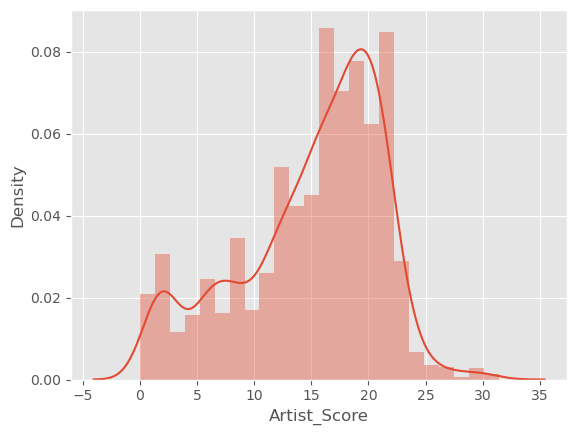

In [288]:
sns.distplot(df_bool["Artist_Score"]);

In [289]:
min_max_scaler = p.MinMaxScaler()
df_bool["Profile_Rating"] = min_max_scaler.fit_transform(df_bool[["Artist_Score"]])*5

In [290]:
df_bool["Profile_Rating"] = df_bool["Profile_Rating"].apply(np.round)

In [291]:
df_bool

,about,demographic,ispublic,coverphoto,stages,hiresphotos,medialinks,headline,preferredpronouns,diversitytagids,embeddedyoutube,eventnumber,venuenumber,links,Artist_Score,Profile_Rating
00059e6c-ed37-42f2-a591-a2b02b04576e,1,1,5,2,1,0,1,1,0,0,3,0.0,0.0,5,20.0,3.0
002cb515-632d-4a8e-9b31-f1091805690f,1,0,5,2,0,1,1,1,0,0,3,0.0,0.0,5,19.0,3.0
00322d12-7309-4ebd-9d2e-fab64225b549,1,0,5,2,1,1,1,1,0,0,3,0.0,0.0,5,20.0,3.0
0033e475-0cfc-420c-86a3-c11f88928718,1,0,0,0,0,0,1,1,0,0,0,0.0,0.0,0,3.0,0.0
0069a3fc-0bfa-4100-bbb3-755410d49b01,1,0,5,2,1,0,1,1,0,0,0,0.0,0.0,1,12.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ff4aadeb-1a06-4c37-a1a9-ff0ad59d9f2a,1,0,5,2,1,1,1,1,1,1,3,2.0,1.8,4,24.8,4.0
ff80afbe-54da-49be-b0c8-6b781028a7ef,1,0,5,2,0,1,1,1,0,0,0,0.0,0.0,2,13.0,2.0
ff86a17a-5596-433f-abb5-52e81fb50076,1,0,5,2,0,1,1,1,0,0,3,0.1,0.2,5,19.3,3.0
ffa6cf04-d632-41ec-b240-cf386e87e6f3,0,0,0,2,0,1,1,0,0,0,0,1.6,0.6,0,6.2,1.0


In [292]:
df_bool["Profile_Rating"].value_counts()

3.0    1050
2.0     511
1.0     276
0.0     169
4.0     154
5.0      12
Name: Profile_Rating, dtype: int64

C:\Users\Kayaharman\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


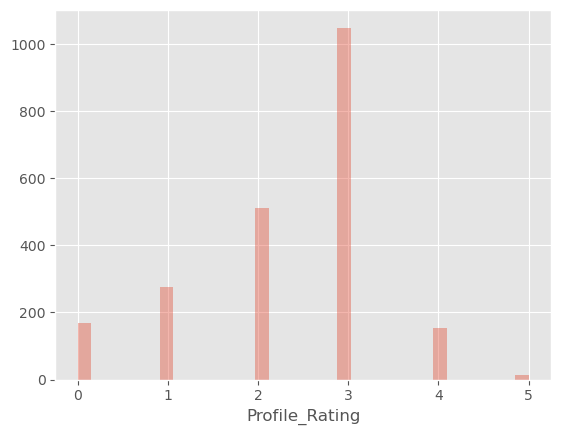

In [293]:
sns.distplot(df_bool["Profile_Rating"], kde=False);

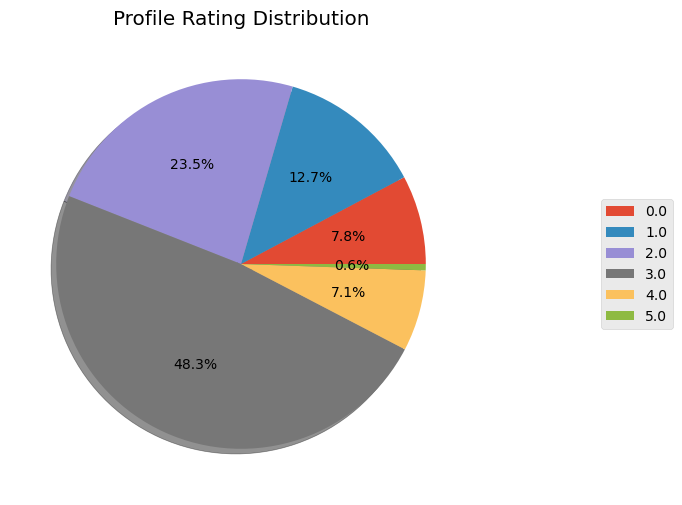

In [294]:
plt.figure(figsize=(6,6))

# explode = [0.01,0.01,0.1]
plt.pie(df_bool["Profile_Rating"].value_counts().sort_index(),autopct='%1.1f%%',shadow=True,startangle=0)
plt.legend(df_bool["Profile_Rating"].value_counts().sort_index().index,bbox_to_anchor=(1.45,0.5),loc='center right')
plt.title('Profile Rating Distribution')
plt.axis('off')
plt.show()

In [295]:
df_bool[df_bool["Profile_Rating"] == 5]

,about,demographic,ispublic,coverphoto,stages,hiresphotos,medialinks,headline,preferredpronouns,diversitytagids,embeddedyoutube,eventnumber,venuenumber,links,Artist_Score,Profile_Rating
01693bc0-8330-4b46-bf93-03cfeecd05b6,1,1,5,2,1,1,1,1,0,1,3,5.0,4.4,5,31.4,5.0
0bbbe547-ddee-4061-bd03-78c3bcab2b5c,1,0,5,2,1,1,1,1,0,0,3,5.0,3.8,5,28.8,5.0
1efe9d58-0e67-486c-8f56-ca0dbb7e5fce,1,1,5,2,1,1,1,1,0,0,3,5.0,5.0,5,31.0,5.0
3483182f-4d6b-4bf3-b805-180b5904bf0e,1,1,5,2,1,1,1,1,0,0,3,5.0,3.2,5,29.2,5.0
3a557ea9-dcab-40f4-b61b-9a17e8ae0f6f,1,1,5,2,1,1,1,1,0,0,3,5.0,3.8,5,29.8,5.0
53e5a5c0-c3a4-4cf6-ab0d-3342c323c6a1,1,1,5,2,1,1,1,1,0,1,3,4.9,2.8,5,29.7,5.0
82630928-d94d-4df8-8eaa-66dc66468ff8,1,1,5,2,1,1,1,1,0,1,3,4.4,2.4,5,28.8,5.0
86543acb-5fbe-4148-b4ad-74d8bc02762e,1,1,5,2,1,1,1,1,1,1,3,5.0,2.6,5,30.6,5.0
94aee0fb-f011-44d0-9b61-76e3dbfe2b78,1,1,5,2,1,1,1,1,0,1,3,5.0,2.6,5,29.6,5.0
959f622a-f11f-4e29-b234-ac630303bf05,1,1,5,2,1,1,1,1,0,0,3,5.0,3.2,5,29.2,5.0


In [297]:
df_bool.to_csv(r'C:\Users\Kayaharman\Desktop\kayaharman\LECTURES\Data Science\Data for Good\Iterations_7.csv')